In [0]:
import os
import torch
import torchvision
from torch import nn

from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.datasets import MNIST
from torchvision.datasets import CIFAR10

import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [0]:
USE_CUDA = True

In [0]:
if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')

In [0]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x.cuda() if USE_CUDA else x

In [0]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [0]:
dataset = CIFAR10('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True,num_workers =8)

In [0]:
def imshow(img, text=None, should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()    

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

In [16]:
vis_dataloader  = DataLoader(dataset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=8)
dataiter = iter(vis_dataloader)


ex_batch_imgs, ex_batch_labels = next(dataiter)
concatenated = torch.cat([ex_batch_imgs[i].squeeze() for i in range(8)],1)
print(concatenated.shape)
#imshow(torchvision.utils.make_grid(concatenated))
print(ex_batch_labels.numpy())

torch.Size([28, 224])
[5 6 0 3 4 0 9 9]


In [0]:
from sklearn.manifold import TSNE
from torch.distributions.multivariate_normal import MultivariateNormal
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
import matplotlib

In [18]:
matplotlib.colors.XKCD_COLORS

{'xkcd:acid green': '#8ffe09',
 'xkcd:adobe': '#bd6c48',
 'xkcd:algae': '#54ac68',
 'xkcd:algae green': '#21c36f',
 'xkcd:almost black': '#070d0d',
 'xkcd:amber': '#feb308',
 'xkcd:amethyst': '#9b5fc0',
 'xkcd:apple': '#6ecb3c',
 'xkcd:apple green': '#76cd26',
 'xkcd:apricot': '#ffb16d',
 'xkcd:aqua': '#13eac9',
 'xkcd:aqua blue': '#02d8e9',
 'xkcd:aqua green': '#12e193',
 'xkcd:aqua marine': '#2ee8bb',
 'xkcd:aquamarine': '#04d8b2',
 'xkcd:army green': '#4b5d16',
 'xkcd:asparagus': '#77ab56',
 'xkcd:aubergine': '#3d0734',
 'xkcd:auburn': '#9a3001',
 'xkcd:avocado': '#90b134',
 'xkcd:avocado green': '#87a922',
 'xkcd:azul': '#1d5dec',
 'xkcd:azure': '#069af3',
 'xkcd:baby blue': '#a2cffe',
 'xkcd:baby green': '#8cff9e',
 'xkcd:baby pink': '#ffb7ce',
 'xkcd:baby poo': '#ab9004',
 'xkcd:baby poop': '#937c00',
 'xkcd:baby poop green': '#8f9805',
 'xkcd:baby puke green': '#b6c406',
 'xkcd:baby purple': '#ca9bf7',
 'xkcd:baby shit brown': '#ad900d',
 'xkcd:baby shit green': '#889717',
 'xkc

In [0]:
z_embeddings = TSNE(n_components=2)
pca = PCA(n_components=3)
colors = ['red','green','blue','purple', 'yellow', 
          'xkcd:light eggplant', 'xkcd:deep turquoise', 'xkcd:light seafoam green',
         'xkcd:pale gold', 'xkcd:cinnamon']

def plot_latent_space(z1, z2, ys):
    plt.clf()
    zs = torch.cat((z1, z2), dim=0).numpy().squeeze()
    ys = ys.astype(int)
    print(zs.shape)
    print(ys.shape)
    zs = pca.fit_transform(zs)

    tsne_vec = z_embeddings.fit_transform(zs)
    #print(tsne_vec)
    #same_class = tsne_vec.compress(ys, axis=0)#np.take(ys, tsne_vec).reshape(1, -1)
    #diff_class = tsne_vec.compress(np.invert(ys), axis=0)# np.take(np.invert(ys), tsne_vec).reshape(1,-1)
    #print(diff_class)
    #plt.scatter(diff_class[:,0], diff_class[:,1], color = 'r')
    #plt.scatter(same_class[:,0], same_class[:,1], color = 'b')
    plt.scatter(tsne_vec[:,0], tsne_vec[:,1], c = ys, cmap=matplotlib.colors.ListedColormap(colors))
    plt.show()

In [20]:
m0 = MultivariateNormal(torch.zeros(10), torch.eye(10))
m0.sample()

m1 = MultivariateNormal(10*torch.ones(10), torch.eye(10))
m1.sample((4,1))

tensor([[[12.0334, 10.3613, 10.9756,  9.7226, 10.3033,  9.4144,  9.4862,
          10.8869, 11.7073, 10.3157]],

        [[ 9.2032,  9.5526,  9.3796,  9.2507, 11.1246, 11.0116, 10.1738,
          10.1639, 10.4240,  9.9626]],

        [[ 9.4760,  8.7295,  9.8324, 10.0481,  9.5606,  9.2310, 10.4303,
          11.2613, 10.4840,  8.5333]],

        [[ 9.5099,  9.5265, 10.8868,  8.9537,  9.0652,  9.7110,  8.7597,
           8.6840,  9.3528,  8.9493]]])

(400, 10)
(400,)


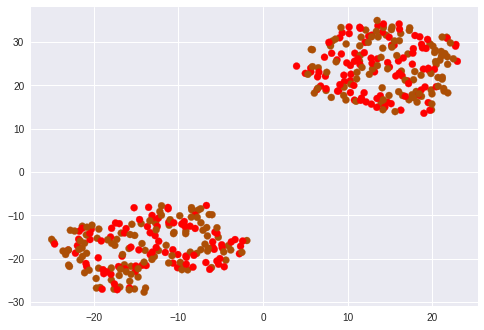

In [21]:
z0 = m0.sample((200,1))
z1 = m1.sample((200,1))
ys = 2 * torch.rand(400, 1) #torch.cat((torch.ones((200,1)), torch.zeros((200,1))))
#print(ys)
plot_latent_space(z0, z1, ys.squeeze().numpy())

In [0]:
embedding_size = 10

In [0]:
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=1, padding=1),  #out ->  b, 16, 14, 14
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),  #out -> b, 16, 8, 8
            
            nn.Conv2d(16, 8, 3, stride=1, padding=1),  #out -> b, 8, 8, 8
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1),  #out -> b, 8, 5, 5
        )
        
        self.lin = nn.Sequential(
            nn.Linear(8*8*8, 200),
            nn.ReLU(),
            nn.Linear(200, embedding_size),
            nn.Sigmoid()
        )
        
    def embed(self, x):
        z = self.encoder(x)
        z = z.view(x.size()[0], -1)
        return self.lin(z)
    
    def forward(self, inp1, inp2):
        z1, z2 = self.embed(inp1), self.embed(inp2)
        y1, y2 = torch.argmax(z1,dim=1), torch.argmax(z2,dim = 1)
        return z1, z2, y1, y2

In [0]:
class siamese_loss(nn.Module):
    def __init__(self, margin=2.0):
        super(siamese_loss, self).__init__()
        self.margin = margin
    
    def forward(self, z1, z2, label):
        #print(type(z1))
        dist = F.pairwise_distance(z1, z2, p=2)
        term1 = (label) * (torch.pow(dist,2)) 
        term2 = (1 - label) * (torch.pow(torch.clamp(self.margin - dist, min = 0.0), 2))
        return torch.mean(term1 + term2)

In [0]:
NUM_EPOCHS = 100
BATCH_SIZE = 128
learning_rate = 1e-3

In [0]:
model = SiameseNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                             weight_decay=1e-5)
sloss = siamese_loss()

if USE_CUDA:
    model = model.cuda()
    sloss = sloss.cuda()

In [0]:
dataloader  = DataLoader(dataset,
                        shuffle=True,
                        num_workers=16,
                        batch_size=512)
bd2 = 256

In [0]:
lf = torch.nn.CrossEntropyLoss()

loss 0.3009759783744812
0.083984375
(512, 10)
(512,)


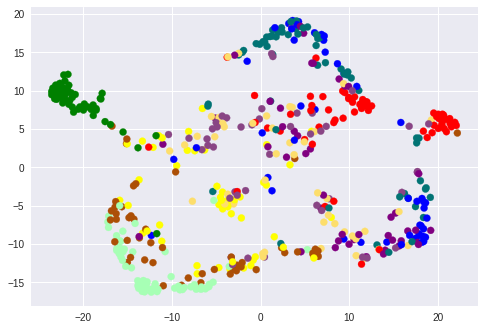

loss 0.3430368900299072
0.109375
loss 0.2264508157968521
0.22265625
loss 0.2616649270057678
0.234375
loss 0.09119731187820435
0.248046875
loss 0.16372594237327576
0.259765625
loss 0.12066324800252914
0.240234375
loss 0.08733391761779785
0.28515625
loss 0.08770952373743057
0.24609375
loss 0.09514474868774414
0.193359375
loss 0.06297368556261063
0.193359375
(512, 10)
(512,)


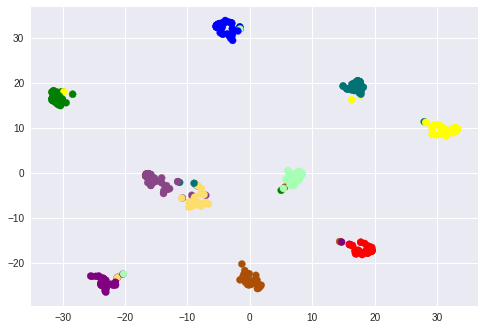

loss 0.08848976343870163
0.15234375
loss 0.039009932428598404
0.1640625
loss 0.0410611629486084
0.12890625
loss 0.06116641312837601
0.12109375
loss 0.047876954078674316
0.07421875
loss 0.02410496026277542
0.044921875
loss 0.04306880384683609
0.060546875
loss 0.037527695298194885
0.041015625
loss 0.02976742759346962
0.05078125
loss 0.020970549434423447
0.02734375
(512, 10)
(512,)


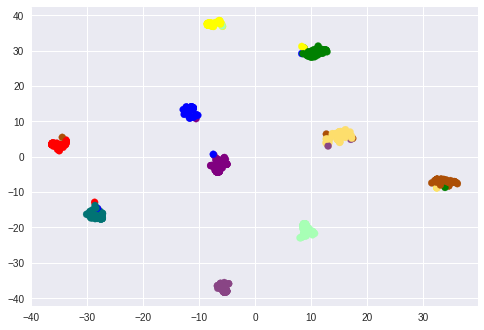

loss 0.018777115270495415
0.04296875
loss 0.026812683790922165
0.056640625
loss 0.03577658161520958
0.046875
loss 0.016154782846570015
0.048828125
loss 0.03300033137202263
0.021484375
loss 0.031315915286540985
0.05078125
loss 0.04090595245361328
0.076171875
loss 0.032919544726610184
0.033203125
loss 0.028623338788747787
0.1328125
loss 0.01727595552802086
0.091796875
(512, 10)
(512,)


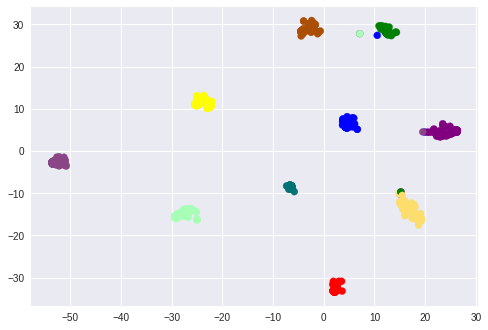

loss 0.007390690501779318
0.087890625
loss 0.04012012854218483
0.06640625
loss 0.02713586390018463
0.115234375
loss 0.01125272549688816
0.087890625
loss 0.03960815817117691
0.123046875
loss 0.011882660910487175
0.08203125
loss 0.0203968808054924
0.10546875
loss 0.015551967546343803
0.1015625
loss 0.03971799463033676
0.095703125
loss 0.006081691011786461
0.080078125
(512, 10)
(512,)


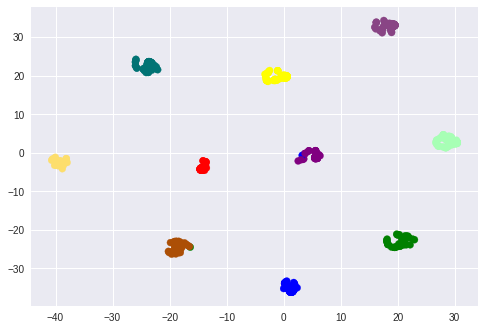

loss 0.011673171073198318
0.09765625
loss 0.037967249751091
0.072265625
loss 0.010661536827683449
0.06640625
loss 0.018159832805395126
0.0859375
loss 0.012026621028780937
0.099609375
loss 0.019153935834765434
0.064453125
loss 0.011453052051365376
0.0859375
loss 0.031229032203555107
0.087890625
loss 0.032949067652225494
0.12890625
loss 0.019770024344325066
0.107421875
(512, 10)
(512,)


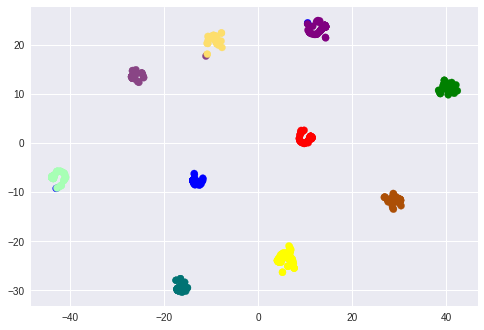

loss 0.03317748010158539
0.091796875
loss 0.014630559831857681
0.109375
loss 0.0290831271559
0.119140625
loss 0.026405557990074158
0.0625
loss 0.007077146787196398
0.07421875
loss 0.012356389313936234
0.087890625
loss 0.009411610662937164
0.095703125
loss 0.02017614245414734
0.0859375
loss 0.03150162845849991
0.072265625
loss 0.009784070774912834
0.078125
(512, 10)
(512,)


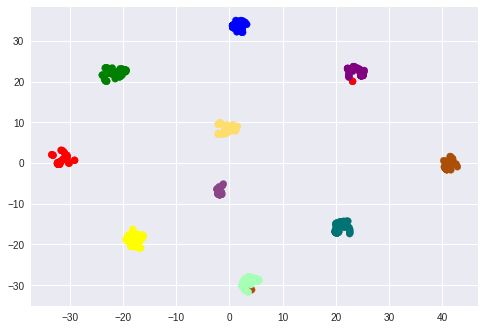

loss 0.014793114736676216
0.111328125
loss 0.008914315141737461
0.11328125
loss 0.030973531305789948
0.08984375
loss 0.028351539745926857
0.064453125
loss 0.009464981034398079
0.109375
loss 0.022573884576559067
0.044921875
loss 0.009772250428795815
0.052734375
loss 0.015433205291628838
0.130859375
loss 0.014299983158707619
0.087890625
loss 0.011973349377512932
0.103515625
(512, 10)
(512,)


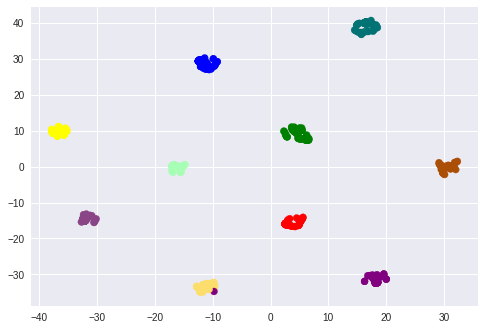

loss 0.005551626905798912
0.08203125
loss 0.01356985792517662
0.091796875
loss 0.022053787484765053
0.150390625
loss 0.015271024778485298
0.125
loss 0.00811028853058815
0.11328125
loss 0.010603288188576698
0.115234375
loss 0.015884526073932648
0.083984375
loss 0.014107986353337765
0.1328125
loss 0.00860404409468174
0.130859375
loss 0.007253939751535654
0.12890625
(512, 10)
(512,)


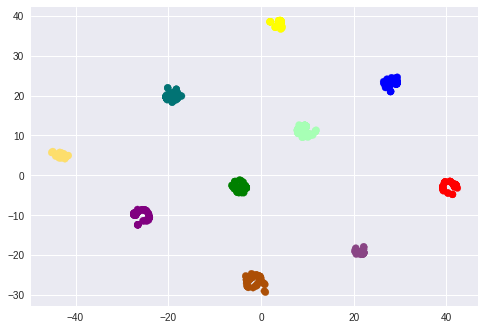

loss 0.0073778824880719185
0.146484375
loss 0.00733637111261487
0.15625
loss 0.011778433807194233
0.103515625
loss 0.008868351578712463
0.107421875
loss 0.00913542602211237
0.1328125
loss 0.010193923488259315
0.107421875
loss 0.02011975646018982
0.16796875
loss 0.008526450023055077
0.154296875
loss 0.022633729502558708
0.12109375
loss 0.010634471662342548
0.12109375
(512, 10)
(512,)


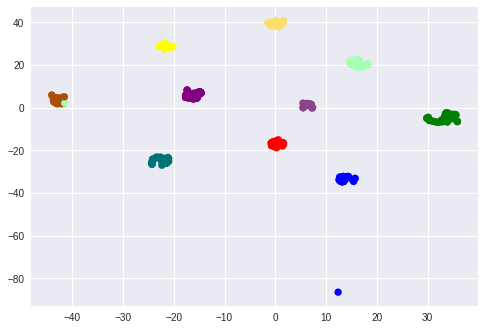

loss 0.027543719857931137
0.158203125
loss 0.010752623900771141
0.119140625
loss 0.008102459833025932
0.125
loss 0.023859858512878418
0.099609375
loss 0.012689625844359398
0.1484375
loss 0.009314147755503654
0.130859375
loss 0.023665502667427063
0.158203125
loss 0.009152200073003769
0.13671875
loss 0.007989704608917236
0.1875


In [29]:
for epoch in range(NUM_EPOCHS):
    for data in dataloader:
        if len(data[0][:bd2]) == len(data[0][bd2:]):
            imgs, ys = data
            imgs1, ys1 = imgs[:bd2], ys[:bd2]
            imgs2, ys2 = imgs[bd2:], ys[bd2:]

            imgs1 = Variable(imgs1, requires_grad = False)
            imgs2 = Variable(imgs2, requires_grad = False)
            
            eq_1 = ys1.numpy() == ys2.numpy()
            eq_1 = torch.Tensor(eq_1.astype(int))
            
            eq_2 = ys2.numpy() == ys1.numpy()
            eq_2 = torch.Tensor(eq_2.astype(int))
            
            
            # ???????
            eq_label = torch.cat((eq_1, eq_2))
            #print(eq_label.shape)
            #print(imgs1.size(),imgs2.size())
            if USE_CUDA:
                imgs1 = imgs1.cuda()
                imgs2 = imgs2.cuda()
                ys1   = ys1.cuda()
                ys2   = ys2.cuda()
                eq_1  = eq_1.cuda()
                eq_2  = eq_2.cuda()
                eq_label = eq_label.cuda()
                
            z1, z2, y1, y2 = model(imgs1, imgs2)

            loss = sloss.forward(z1, z2, eq_1)#lf(z1, ys1) + lf(z2, ys2)#
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


    print('loss', loss.cpu().item())
    acc = (torch.sum(ys1 == y1).data.cpu().numpy() + torch.sum(ys2 == y2).data.cpu().numpy()) / (2.0*bd2)
    print(acc)
    if epoch % 10 == 0:
        #print(ys)
        plot_latent_space(z1.data.cpu(), z2.data.cpu(), ys.numpy())